# OpenCV Darknet Yolo를 이용하여 이미지 Object Detection
- yolo를 이용하여 Object Detection

In [1]:
# 입력 이미지로 사용될 이미지 다운로드
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-08-19 04:59:47--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2021-08-19 04:59:47 (8.43 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



# Darket Yolo사이트에서 coco로 학습된 Inference모델과 환경파일을 다운로드, 이를 이용해 OpenCV에서 Inference 모델 생성

In [34]:
# !mkdir /content/pretrained
# !wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
# !wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
!wget -O /content/pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O /content/pretrained/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true
!ls /content/pretrained

--2021-08-19 06:40:56--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3-tiny.weights’

/content/pretrained 100%[===================>]  33.79M  15.4MB/s    in 2.2s    

2021-08-19 06:40:59 (15.4 MB/s) - ‘/content/pretrained/yolov3-tiny.weights’ saved [35434956/35434956]

--2021-08-19 06:40:59--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg [following]
--2021-08-19 06:40:59--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg
Reus

# readNetFormDarknet(config파일, weight파일)을 이용하여 yolo inference network 모델 로딩

In [3]:
import os
import cv2

weights_path = '/content/pretrained/yolov3.weights'
config_path = '/content/pretrained/yolov3.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

# COCO class id와 class명 매핑

In [4]:
labels_to_names_seq = {}
with open('/content/pretrained/coco.names', 'r') as f:
  labels_to_names_seq = {i: line.strip() for i, line in enumerate(f.readlines())}
labels_to_names_seq

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorbike',
 4: 'aeroplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'sofa',
 58: 'pottedplant',
 59: 'bed',
 60: 'diningtable',
 61: 'toilet',
 62: 'tvmonitor',
 63: 'laptop',
 64: 

# 3개의 scale Output layer에서 결과 데이터 추출

In [5]:
layer_names = cv_net_yolo.getLayerNames()
print('### yolo v3 layer name:', layer_names)
print('final output layer id:', cv_net_yolo.getUnconnectedOutLayers())
print('final output layer name:', [layer_names[i[0] -1] 
                                   for i in cv_net_yolo.getUnconnectedOutLayers()])

### yolo v3 layer name: ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37',

In [6]:
layer_names = cv_net_yolo.getLayerNames()
outlayer_names = [layer_names[i[0] -1] for i in cv_net_yolo.getUnconnectedOutLayers()]
img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 로딩한 모델은 yolo v3 416 x 416 모델임, 원본 이미지 배열 사이즈로 변환.
cv_net_yolo.setInput(cv2.dnn.blobFromImage(img, scalefactor=1/255.0, 
                                       size=(416, 416), swapRB=True,
                                       crop=False))
# Object Detection 수행 후 결과 cv_outs으로 변환
cv_outs = cv_net_yolo.forward(outlayer_names)
print('cv_outs type:', type(cv_outs), 'cv_outs의 내부 원소 개수:', len(cv_outs))
print(cv_outs[0].shape, cv_outs[1].shape, cv_outs[2].shape)
print(cv_outs)

cv_outs type: <class 'list'> cv_outs의 내부 원소 개수: 3
(507, 85) (2028, 85) (8112, 85)
[array([[0.03803749, 0.0470234 , 0.3876816 , ..., 0.        , 0.        ,
        0.        ],
       [0.04705836, 0.03385845, 0.2689603 , ..., 0.        , 0.        ,
        0.        ],
       [0.04941482, 0.03791986, 0.7151826 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9585798 , 0.9460585 , 0.35046625, ..., 0.        , 0.        ,
        0.        ],
       [0.96015006, 0.9630715 , 0.29724196, ..., 0.        , 0.        ,
        0.        ],
       [0.9663636 , 0.9657401 , 0.79356086, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01637367, 0.02457962, 0.04684627, ..., 0.        , 0.        ,
        0.        ],
       [0.01678773, 0.01458679, 0.46203217, ..., 0.        , 0.        ,
        0.        ],
       [0.02219823, 0.01376948, 0.0662718 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97421783, 0.97686917

# 3개 scale output layer에서 Object Detection 정보를 모두 수집
- center 와 width, height좌표는 모두 좌상단, 우하단 좌표로 변경.

In [11]:
import numpy as np
# 원본 이미지를 네트워크에 입력시에는 (416, 416)로 리자이즈 함.
# 이후 결과가 출력되면 리자이즈된 이미지 기반으로 bounding box 위치가 예측 됨,
# 이를 다시 원복하기 위해 원본이미지 shape 정보가 필요.
rows = img.shape[0]
cols = img.shape[1]
conf_threshold = 0.5
nms_threshold = 0.4

# bounding box 의 테두리와 caption 글자색 지정
green_color = (0, 255, 0)
red_color = (0, 0, 255)

class_ids = []
confidences = []
boxes = []

# 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화
for ix, output in enumerate(cv_outs):
  print('output shape:', output.shape)
  for jx, detection in enumerate(output):
    # class score는 detection배열에서 5번째 이후 위치에 있는 값.
    class_scores = detection[5:]
    # class score배열에서 가장 높은 값을 가지는 class confidence, 그때의 위치 인덱스가 class id
    class_id = np.argmax(class_scores)
    confidence = class_scores[class_id]
    # confidence가 지정된 Conf_threshold보다 작은 값 제외
    if confidence > conf_threshold:
      print('ix: ', ix, 'jx: ', jx, 'class_id: ', 
            class_id, 'confidence: ', confidence)
      # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의
      # 중심좌표와 너비/높이를 반환, 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
      center_x = int(detection[0] * cols)
      center_y = int(detection[1] * rows)
      width = int(detection[2] * cols)
      height = int(detection[3] * rows)
      left = int(center_x - width / 2)
      top = int(center_y - height / 2)
      # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 
      # 좌표정보를 모두 수집.
      class_ids.append(class_id)
      confidences.append(float(confidence))
      boxes.append([left, top, width, height])


output shape: (507, 85)
ix:  0 jx:  319 class_id:  0 confidence:  0.9317017
ix:  0 jx:  328 class_id:  0 confidence:  0.96232384
ix:  0 jx:  334 class_id:  0 confidence:  0.9984486
ix:  0 jx:  343 class_id:  0 confidence:  0.9978433
output shape: (2028, 85)
ix:  1 jx:  831 class_id:  2 confidence:  0.8169964
ix:  1 jx:  955 class_id:  2 confidence:  0.8472691
ix:  1 jx:  1262 class_id:  0 confidence:  0.9877816
ix:  1 jx:  1280 class_id:  0 confidence:  0.99840033
ix:  1 jx:  1295 class_id:  0 confidence:  0.6916561
ix:  1 jx:  1313 class_id:  0 confidence:  0.9205806
output shape: (8112, 85)
ix:  2 jx:  2883 class_id:  2 confidence:  0.9077368
ix:  2 jx:  2886 class_id:  2 confidence:  0.63324535
ix:  2 jx:  3048 class_id:  2 confidence:  0.9412014
ix:  2 jx:  3051 class_id:  2 confidence:  0.615405
ix:  2 jx:  3184 class_id:  2 confidence:  0.95041
ix:  2 jx:  3214 class_id:  2 confidence:  0.9064125
ix:  2 jx:  3373 class_id:  2 confidence:  0.68998003
ix:  2 jx:  3394 class_id:  0 

# NMS를 이용하여 각 Output laber에서 Detected된 Object의 겹치는 Bounding box를 제외

In [23]:
conf_threshold = 0.5
nms_threshold = 0.4
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
idxs

array([[ 2],
       [ 7],
       [ 3],
       [ 6],
       [14],
       [12],
       [10],
       [15],
       [ 5],
       [ 4],
       [17],
       [16],
       [11],
       [13]], dtype=int32)

In [15]:
idxs.flatten()

array([ 2,  7,  3,  6, 14, 12, 10, 15,  5,  4, 17, 16, 11, 13],
      dtype=int32)

# NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object 정보를 추출하고 시각화

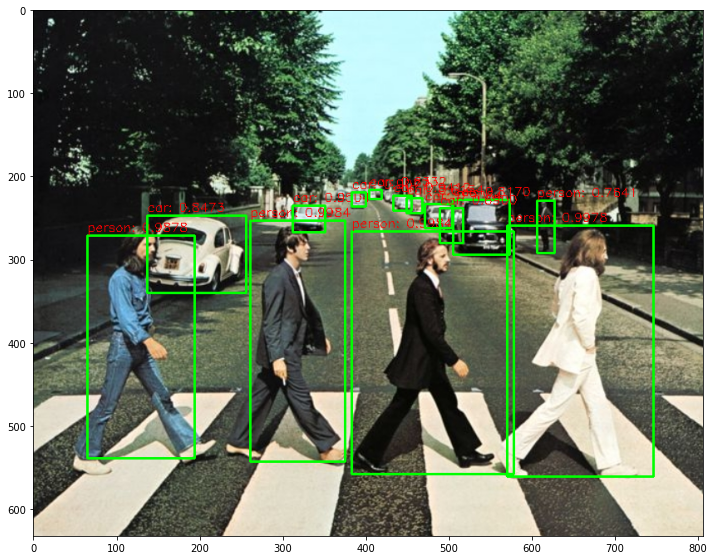

In [24]:
import matplotlib.pyplot as plt
# cv2d의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 함.
draw_img = img.copy()

# NMS로 최종 FIltering된 idxs를 이용 정보 추출
if len(idxs) > 0:
  for i in idxs.flatten():
    box = boxes[i]
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]
    caption = '{}: {:.4f}'.format(labels_to_names_seq[class_ids[i]], 
                                  confidences[i])
    cv2.rectangle(draw_img, 
                  (int(left), int(top)), 
                  (int(left+width), int(top+height)), color=green_color,
                  thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top-5)), 
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

In [27]:
# 단일 이미지를 Yolo로 detect하는 get_detected_img() 함수 선언.
def get_detecte_img(cv_net, img_array, 
                    conf_threshold=0.5, nms_threshold=0.4, is_print=True):
  # conf_threshold = 0.5
  # nms_threshold = 0.4
  rows = img_array.shape[0]
  cols = img_array.shape[1]
  draw_img = img_array.copy()
  layer_names = cv_net_yolo.getLayerNames()
  outlayer_names = [layer_names[i[0] -1] for i in cv_net_yolo.getUnconnectedOutLayers()]
  cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, 
                                       size=(416, 416), swapRB=True,
                                       crop=False))
  start = time.time()
  cv_outs = cv_net.forward(outlayer_names)

  green_color = (0, 255, 0)
  red_color = (0, 0, 255)

  class_ids = []
  confidences = []
  boxes = []

  for ix, output in enumerate(cv_outs):
    for jx, detection in enumerate(output):
      class_scores = detection[5:]
      class_id = np.argmax(class_scores)
      confidence = class_scores[class_id]
      if confidence > conf_threshold:
        print('ix: ', ix, 'jx: ', jx, 'class_id: ', 
              class_id, 'confidence: ', confidence)
        center_x = int(detection[0] * cols)
        center_y = int(detection[1] * rows)
        width = int(detection[2] * cols)
        height = int(detection[3] * rows)
        left = int(center_x - width / 2)
        top = int(center_y - height / 2)
        class_ids.append(class_id)
        confidences.append(float(confidence))
        boxes.append([left, top, width, height])
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
  if len(idxs) > 0:
    for i in idxs.flatten():
      box = boxes[i]
      left = box[0]
      top = box[1]
      width = box[2]
      height = box[3]
      caption = '{}: {:.4f}'.format(labels_to_names_seq[class_ids[i]], 
                                    confidences[i])
      cv2.rectangle(draw_img, 
                    (int(left), int(top)), 
                    (int(left+width), int(top+height)), color=green_color,
                    thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top-5)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
  if is_print:
    print('Detection 수행시간: ', round(time.time() - start, 2), '초')
  return draw_img


ix:  0 jx:  319 class_id:  0 confidence:  0.9317017
ix:  0 jx:  328 class_id:  0 confidence:  0.96232384
ix:  0 jx:  334 class_id:  0 confidence:  0.9984486
ix:  0 jx:  343 class_id:  0 confidence:  0.9978433
ix:  1 jx:  831 class_id:  2 confidence:  0.8169964
ix:  1 jx:  955 class_id:  2 confidence:  0.8472691
ix:  1 jx:  1262 class_id:  0 confidence:  0.9877816
ix:  1 jx:  1280 class_id:  0 confidence:  0.99840033
ix:  1 jx:  1295 class_id:  0 confidence:  0.6916561
ix:  1 jx:  1313 class_id:  0 confidence:  0.9205806
ix:  2 jx:  2883 class_id:  2 confidence:  0.9077368
ix:  2 jx:  2886 class_id:  2 confidence:  0.63324535
ix:  2 jx:  3048 class_id:  2 confidence:  0.9412014
ix:  2 jx:  3051 class_id:  2 confidence:  0.615405
ix:  2 jx:  3184 class_id:  2 confidence:  0.95041
ix:  2 jx:  3214 class_id:  2 confidence:  0.9064125
ix:  2 jx:  3373 class_id:  2 confidence:  0.68998003
ix:  2 jx:  3394 class_id:  0 confidence:  0.76407045
Detection 수행시간:  2.47 초


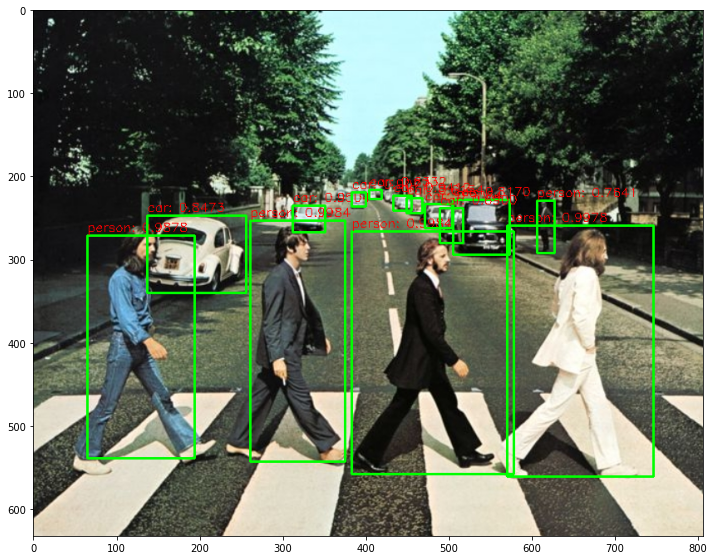

In [36]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

img = cv2.imread('/content/data/beatles01.jpg')
weights_path = '/content/pretrained/yolov3.weights'
config_path = '/content/pretrained/yolov3.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

draw_img = get_detecte_img(cv_net_yolo, img)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

In [37]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

img = cv2.imread('/content/data/beatles01.jpg')
weights_path = '/content/pretrained/yolov3-tiny.weights'
config_path = '/content/pretrained/yolov3-tiny.cfg'

cv_net_tiny = cv2.dnn.readNetFromDarknet(config_path, weights_path)

draw_img = get_detecte_img(cv_net_tiny, img)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

error: ignored

ix:  0 jx:  319 class_id:  0 confidence:  0.9317017
ix:  0 jx:  328 class_id:  0 confidence:  0.96232384
ix:  0 jx:  334 class_id:  0 confidence:  0.9984486
ix:  0 jx:  343 class_id:  0 confidence:  0.9978433
ix:  1 jx:  831 class_id:  2 confidence:  0.8169964
ix:  1 jx:  832 class_id:  7 confidence:  0.43094027
ix:  1 jx:  955 class_id:  2 confidence:  0.8472691
ix:  1 jx:  1262 class_id:  0 confidence:  0.9877816
ix:  1 jx:  1280 class_id:  0 confidence:  0.99840033
ix:  1 jx:  1290 class_id:  26 confidence:  0.30035913
ix:  1 jx:  1295 class_id:  0 confidence:  0.6916561
ix:  1 jx:  1313 class_id:  0 confidence:  0.9205806
ix:  2 jx:  2877 class_id:  2 confidence:  0.42771325
ix:  2 jx:  2883 class_id:  2 confidence:  0.9077368
ix:  2 jx:  2886 class_id:  2 confidence:  0.63324535
ix:  2 jx:  2889 class_id:  2 confidence:  0.33344063
ix:  2 jx:  3048 class_id:  2 confidence:  0.9412014
ix:  2 jx:  3051 class_id:  2 confidence:  0.615405
ix:  2 jx:  3054 class_id:  2 confidence:  0.4

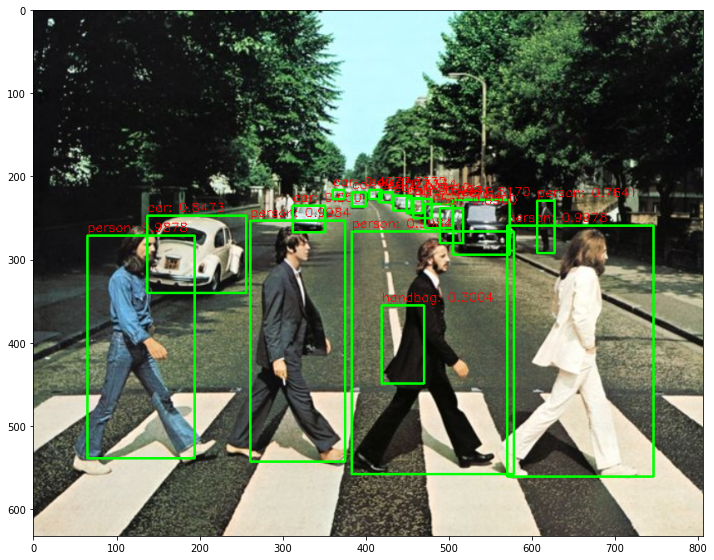

In [40]:
draw_img = get_detecte_img(cv_net_yolo, img, 0.3, 0.5)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()